In [3]:
!python -m spacy download en_core_web_md
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.1 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 20.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 17.5 MB/s eta 0:00:00m eta 0:00:010:00:01


Cosine similarity for 'bank' in the given context: 0.3743416368961334


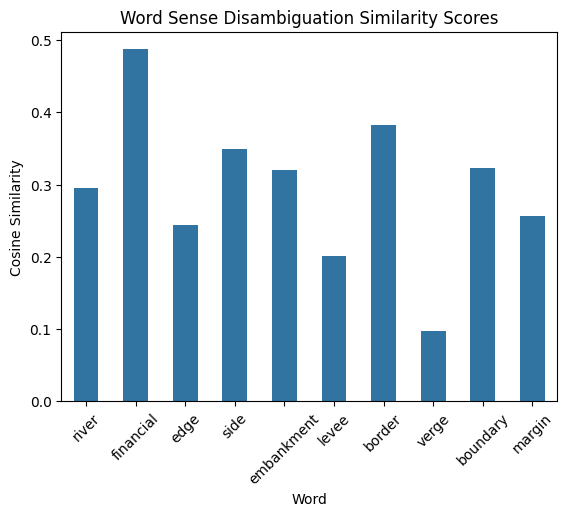

In [4]:
# Import necessary libraries
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load('en_core_web_md')  # Use a medium or large model for better accuracy

# Define a function for word sense disambiguation
def disambiguate_word(sentence, target_word):
    # Process the sentence using spaCy
    doc = nlp(sentence)

    # Extract the context vector by averaging the vectors of the surrounding words
    context_vector = np.mean([token.vector for token in doc if token.text != target_word], axis=0)

    # Get the vector of the target word
    target_vector = nlp(target_word).vector

    # Compute cosine similarity between context and target word
    similarity = cosine_similarity([context_vector], [target_vector])[0][0]

    return similarity

# Example usage
sentence = "I went to the bank to deposit money."
target_word = "bank"
similarity_score = disambiguate_word(sentence, target_word)

print(f"Cosine similarity for '{target_word}' in the given context: {similarity_score}")

# Visualizing the similarity scores with gaps between bars
def visualize_similarity(similarity_scores, words):
    sns.barplot(x=words, y=similarity_scores, width=0.5)  # Adjust the width to create gaps
    plt.title('Word Sense Disambiguation Similarity Scores')
    plt.xlabel('Word')
    plt.ylabel('Cosine Similarity')
    plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
    plt.show()

# Example visualization
sentence = "I went to the bank to deposit money."
words = ['river', 'financial', 'edge', 'side', 'embankment', 'levee', 'border', 'verge', 'boundary', 'margin']
similarity_scores = [disambiguate_word(sentence, word) for word in words]
visualize_similarity(similarity_scores, words)

Named Entities:
('March 2021', 'DATE')
('Sarah Johnson', 'PERSON')
('GenTech Innovations', 'ORG')
('San Francisco', 'GPE')
('EcoPower Europe', 'ORG')
('Paris', 'GPE')
('SolarTech Asia', 'PRODUCT')
('Singapore', 'GPE')
('Tokyo', 'GPE')
('Japan', 'GPE')
('Elon Musk', 'PERSON')


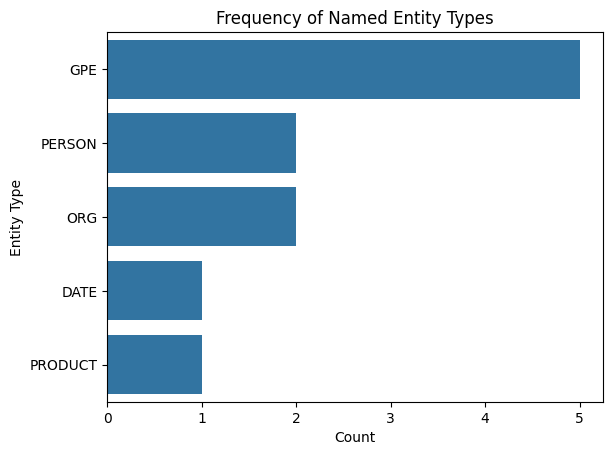

In [5]:
# Import necessary libraries
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load spaCy's pre-trained English model
nlp = spacy.load("en_core_web_sm")

# Define a function to perform Named Entity Recognition
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities, doc

# Example text for NER
text = """
In March 2021, Dr. Sarah Johnson and her team at GenTech Innovations embarked on a groundbreaking project focused on renewable energy solutions.
The project, headquartered in San Francisco, aims to collaborate with various international partners, including EcoPower Europe in Paris and SolarTech Asia in Singapore.
The announcement came during a global conference on climate change held in Tokyo, Japan, which attracted experts and activists from around the world, including notable speaker Elon Musk.
"""

# Perform NER on the example text
entities, doc = perform_ner(text)

# Print the named entities
print("Named Entities:")
for entity in entities:
    print(entity)

# Visualize the named entities using spaCy's displaCy
displacy.render(doc, style="ent", jupyter=True)

# Prepare data for visualization with seaborn
entity_labels = [label for _, label in entities]
entity_counts = pd.Series(entity_labels).value_counts()

# Plot the frequency of named entity types using seaborn
sns.countplot(y=entity_labels, order=entity_counts.index)
plt.title("Frequency of Named Entity Types")
plt.xlabel("Count")
plt.ylabel("Entity Type")
plt.show()
